In [1]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils
from keras import initializers

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import model_from_json

Using TensorFlow backend.


In [ ]:
from platform import python_version

print(python_version())

In [ ]:
#https://github.com/acht7111020/CNN_object_classification/blob/master/model/ModelandPredict.py

In [18]:
num_classed = 100
model = Sequential()
categories = ['apples', 'aquarium fish', 'baby', 'bear', 'beaver',
            'bed', 'bee', 'beetle', 'bicycle', 'bottles',
            'bowls','boy', 'bridge', 'bus', 'butterfly', 
            'camel', 'cans', 'castle', 'caterpillar', 'cattle', 
            'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 
            'couch', 'crab', 'crocodile', 'cups', 
            'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 
            'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer keyboard', 'lamp', 
            'lawn-mower', 'leopard', 'lion', 'lizard', 'lobster', 
            'man', 'maple', 'motorcycle', 'mountain', 'mouse', 
            'mushrooms', 'oak', 'oranges', 'orchids', 'otter', 
            'palm', 'pears', 'pickup truck', 'pine', 'plain', 
            'plates', 'poppies', 'porcupine', 'possum', 'rabbit', 
            'raccoon', 'ray', 'road', 'rocket', 'roses', 'sea', 
            'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 
            'snail', 'snake', 'spider', 'squirrel', 'streetcar', 
            'sunflowers', 'sweet peppers', 'table', 'tank', 'telephone', 
            'television', 'tiger', 'tractor', 'train', 'trout', 
            'tulips', 'turtle', 'wardrobe', 'whale', 'willow', 
            'wolf', 'woman', 'worm']
print(len(categories))

100


In [19]:
# load json and create model
json_file = open('resources/cifar-100-python/100model_70.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("resources/cifar-100-python/100model_70.h5")
print("Loaded model from disk")

Loaded model from disk


In [20]:
def normalize(X_test):
    mean = 121.936
    std = 68.389
    X_test = (X_test-mean)/(std+1e-7)
    return X_test

In [21]:
#from scipy import misc
from skimage.transform import resize
def model_predict(figure):
    test = resize(figure, (32,32,3)).transpose(2,0,1)
    test = test.astype('float32')
    test = normalize(test)
    test = np.expand_dims(test, axis=0)

    y_proba = model.predict(test)
    classed = model.predict_classes(test, verbose=0)
    print(classed)
    if max(y_proba[0]) > 0.5:
        return(categories[classed[0]])
    else:
        return ''
    

[23]
cloud


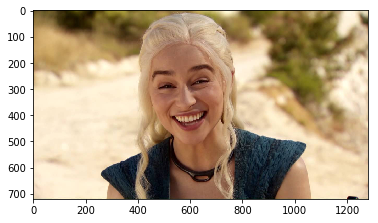

In [23]:
import matplotlib.pyplot as plt
filename = 'C:/Users/Arlen/Desktop/images/05.jpg'
testimg = plt.imread(filename)
plt.imshow(testimg)
print(model_predict(testimg))